In [87]:
import pandas as pd
import numpy as np
import os

In [88]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
movies = pd.read_csv('Join_TMDB_Filtered.csv')

In [90]:
movies.columns

Index(['movieId', 'title', 'genres', 'release_year', 'Adventure', 'Animation',
       'Children', 'Comedy', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime',
       'Thriller', 'Horror', 'Mystery', 'Sci-Fi', 'IMAX', 'Documentary', 'War',
       'Musical', 'Western', 'Film-Noir', '(no genres listed)',
       'movielens_number_reviews', 'movielens_avg_rating', 'imdbId', 'tmdbId',
       'tmdb_info', 'tmdb_cast'],
      dtype='object')

In [91]:
movies.head()

,movieId,title,genres,release_year,Adventure,Animation,Children,Comedy,Fantasy,Romance,...,Musical,Western,Film-Noir,(no genres listed),movielens_number_reviews,movielens_avg_rating,imdbId,tmdbId,tmdb_info,tmdb_cast
0,53207,88 Minutes (2008),"['Crime', 'Drama', 'Mystery', 'Thriller']",2008,0,0,0,0,0,0,...,0,0,0,0,628,2.936,411061,3489,"{'adult': False, 'backdrop_path': '/gLU169RfA0...","[{'cast_id': 1, 'character': 'Jack Gramm', 'cr..."
1,55603,My Mom's New Boyfriend (2008),"['Action', 'Comedy', 'Romance', 'Thriller']",2008,0,0,0,1,0,1,...,0,0,0,0,59,2.924,780534,9262,"{'adult': False, 'backdrop_path': '/oCbczxmpLM...","[{'cast_id': 11, 'character': 'Marthy Durand',..."
2,55830,Be Kind Rewind (2008),['Comedy'],2008,0,0,0,1,0,0,...,0,0,0,0,1511,3.231,799934,4953,"{'adult': False, 'backdrop_path': '/4jydtNkMFA...","[{'cast_id': 12, 'character': 'Jerry', 'credit..."
3,56949,27 Dresses (2008),"['Comedy', 'Romance']",2008,0,0,0,1,0,1,...,0,0,0,0,2108,3.170,988595,6557,"{'adult': False, 'backdrop_path': '/jwV0wmhEqH...","[{'cast_id': 14, 'character': 'Jane Nichols', ..."
4,57326,In the Name of the King: A Dungeon Siege Tale ...,"['Action', 'Adventure', 'Fantasy']",2008,1,0,0,0,1,0,...,0,0,0,0,241,2.062,460780,2312,"{'adult': False, 'backdrop_path': '/u14b6vdFie...","[{'cast_id': 13, 'character': 'Farmer', 'credi..."


In [92]:
tmovies.head()

,Unnamed: 0,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,0,False,/ok6Ws65nDSLAIKkKgIjqyM5OGCc.jpg,NaN,130000000,"[{'id': 28, 'name': 'Action'}, {'id': 9648, 'n...",https://www.warnerbros.com/watchmen,13183,tt0409459,en,...,2009-03-05,185258983,163.000,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Justice is coming to all of us. No matter wha...,Watchmen,False,7.200,3918
1,0,False,/mBVyrtzC2aHkPfbN8iKXCwJRaKE.jpg,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,13401,tt0809504,en,...,2008-02-29,22707064,90.000,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,The Accidental Husband,False,5.300,249
2,0,False,/pUNlJ6jzDsgUvPjJeFfsyyOSZJx.jpg,NaN,32000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 18, '...",http://www.theroad-movie.com/,20766,tt0898367,en,...,2009-11-25,27635305,111.000,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,In a moment the world changed forever.,The Road,False,6.900,1497
3,0,False,/f7pTesNnPjOVAq7QqhgnSHaK9Cc.jpg,NaN,30000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",http://www.bridewars.com,10521,tt0901476,en,...,2009-01-09,114663461,89.000,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,May the best bride win,Bride Wars,False,6.000,1282
4,0,False,/3ggNo1od6Rs1eJwhU3TkwJi3wbi.jpg,"{'id': 264437, 'name': 'My Bloody Valentine Co...",15000000,"[{'id': 9648, 'name': 'Mystery'}, {'id': 27, '...",http://www.mybloodyvalentinein3d.com/,14435,tt1179891,en,...,2009-01-16,102836002,101.000,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,He's gonna break your heart.,My Bloody Valentine,False,5.300,433


In [93]:
movies = pd.merge(movies, tmovies, how='left', left_on='tmdbId', right_on='id',  suffixes=('', '_t'))

In [94]:
movies.head()

,movieId,title,genres,release_year,Adventure,Animation,Children,Comedy,Fantasy,Romance,...,release_date,revenue,runtime,spoken_languages,status,tagline,title_t,video,vote_average,vote_count
0,53207,88 Minutes (2008),"['Crime', 'Drama', 'Mystery', 'Thriller']",2008,0,0,0,0,0,0,...,NaN,nan,nan,NaN,NaN,NaN,NaN,NaN,nan,nan
1,55603,My Mom's New Boyfriend (2008),"['Action', 'Comedy', 'Romance', 'Thriller']",2008,0,0,0,1,0,1,...,NaN,nan,nan,NaN,NaN,NaN,NaN,NaN,nan,nan
2,55830,Be Kind Rewind (2008),['Comedy'],2008,0,0,0,1,0,0,...,NaN,nan,nan,NaN,NaN,NaN,NaN,NaN,nan,nan
3,56949,27 Dresses (2008),"['Comedy', 'Romance']",2008,0,0,0,1,0,1,...,NaN,nan,nan,NaN,NaN,NaN,NaN,NaN,nan,nan
4,57326,In the Name of the King: A Dungeon Siege Tale ...,"['Action', 'Adventure', 'Fantasy']",2008,1,0,0,0,1,0,...,NaN,nan,nan,NaN,NaN,NaN,NaN,NaN,nan,nan


In [103]:
pd.set_option('display.max_columns', None)

# Datetime

In [95]:
movies['release_date'] = pd.to_datetime(movies['release_date'])
movies['year'] = movies.release_date.dt.year
movies['month'] = movies.release_date.dt.month
movies['dow'] = movies.release_date.dt.weekday

In [121]:
movies['pl'] = movies['revenue'] - movies['budget']

# Revenue

In [122]:
#exclude movies with 0 budgets
movies_1 = movies[movies['budget'] > 0]


Distributions for both revenue and budget appear heavily right skewed, with most movies costing and making no money at all

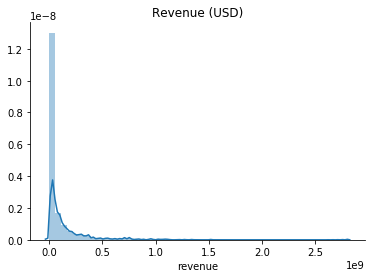

In [162]:
sns.distplot(movies_1['revenue']).set_title('Revenue (USD)')
sns.despine()


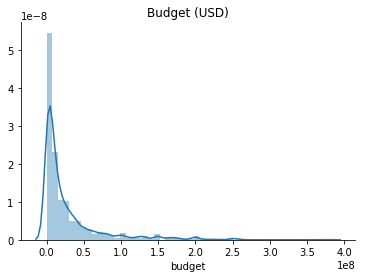

In [163]:
sns.distplot(movies_1['budget']).set_title('Budget (USD)')
sns.despine()

In general, total revenues appear to be far higher than budgets

Text(0.5,0,'Release year')

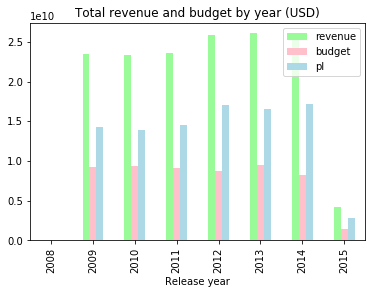

In [165]:

movies.groupby('release_year')['revenue', 'budget', 'pl'].sum().sort_index(ascending=True).plot(kind='bar', color=['palegreen', 'pink', 'lightblue'])
plt.title('Total revenue and budget by year (USD)')
plt.xlabel('Release year')


The average movie appears to make more than its budget

Text(0.5,0,'Release year')

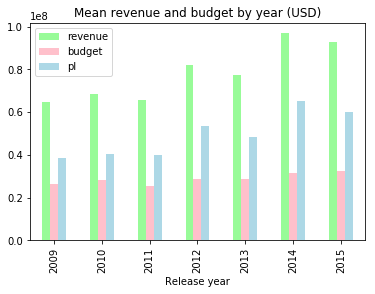

In [126]:
ax = movies_1.groupby('release_year')['revenue', 'budget', 'pl'].agg(np.mean).sort_index(ascending=True).plot(kind='bar', color=['palegreen', 'pink', 'lightblue'])
plt.title('Mean revenue and budget by year (USD)')
plt.xlabel('Release year')


However, this hides the issue that the mean is heavily affected by outliers. Strangely, the median profit appears to be quite unrelated to the median revenue and budget

Text(0.5,0,'Release year')

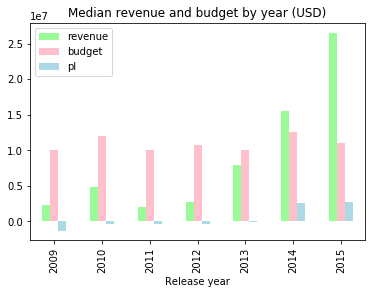

In [130]:
ax = movies_1.groupby('release_year')['revenue', 'budget', 'pl'].agg(np.median).sort_index(ascending=True).plot(kind='bar', color=['palegreen', 'pink', 'lightblue'])
plt.title('Median revenue and budget by year (USD)')
plt.xlabel('Release year')
